In [130]:
'''
This program is used to plot the rotational constant and dipole distributions for the 
BigData1 paper.
'''

# import packages
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib as mpl
import corner
from matplotlib.patches import Patch

In [131]:
# set rc params for matplotlib
mpl.rcParams['font.family'] = 'STIXGeneral'
mpl.rcParams['font.size'] = 12
mpl.rcParams['legend.fontsize'] = 12

mpl.rcParams['mathtext.fontset'] = 'custom'
mpl.rcParams['mathtext.rm'] = 'Bitstream Vera Sans'
mpl.rcParams['mathtext.it'] = 'Bitstream Vera Sans:italic'
mpl.rcParams['mathtext.bf'] = 'Bitstream Vera Sans:bold'
mpl.rcParams['mathtext.fontset'] = 'stix'

mpl.rcParams['figure.figsize'] = [5,5]

mpl.rcParams['axes.linewidth'] = 1

mpl.rcParams['lines.markersize'] = 5

mpl.rcParams['legend.fancybox'] = False
mpl.rcParams['legend.framealpha'] = 1.0
mpl.rcParams['legend.edgecolor'] = 'k'
mpl.rcParams['legend.markerscale'] = 1.0

# -- Ticks and tick labels --
mpl.rcParams['axes.edgecolor'] = 'k'
mpl.rcParams['xtick.color'] = 'k'
mpl.rcParams['ytick.color'] = 'k'
mpl.rcParams['xtick.major.width'] = 1
mpl.rcParams['ytick.major.width'] = 1
mpl.rcParams['xtick.major.size'] = 5
mpl.rcParams['ytick.major.size'] = 5

mpl.rcParams['savefig.bbox'] = 'tight'
mpl.rcParams['savefig.dpi'] = 500
mpl.rcParams['savefig.transparent'] = True

# Code 

In [167]:
# df_ground = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1_GroundState.csv') # load groundstate csv file
df_all = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/B971_def2TZVPD_DataFile1.csv') 
df_bio = pd.read_csv('/Users/z5380625/Documents/Research/4_BigData/6_Atoms/biosig_CHNOPS.csv') 
# rays_asymm = (2*df_ground['B [cm-1]'].values - df_ground['A [cm-1]'].values - df_ground['C [cm-1]'].values)/(df_ground['A [cm-1]'].values - df_ground['C [cm-1]'].values)

# df_ground['rays_asymm'] = rays_asymm

df_bio[df_bio['Formula_ID']=='CHNO_2']

,Unnamed: 0,Formula,Formula_ID,Tot_atoms,Tot_nH_atoms,Tot_H_atoms,SMILES,Dataset_no,Molecular_weight,IUPAC_chemname,...,EPISUITE,InChI_Code,InChI_Key,Boiling_Point,BP_basis,EPIsuite_output,MP,Basis,Life,CHNOPS
16360,16360,CHNO,CHNO_2,4,3,1,N=C=O,20139,43.025,isocyanic acid,...,N=C=O,InChI=1S/CHNO/c2-1-3/h2H,InChIKey=OWIKHYCFFJSOEH-UHFFFAOYSA-N,17.63,Pr,17.63(BP est) -82.08(MP est) ----(...,-82.08,Pred,N,Y


<Figure size 500x500 with 0 Axes>

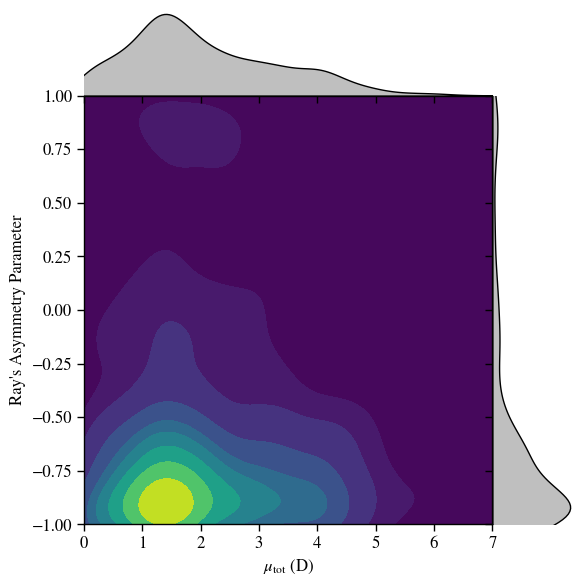

In [6]:

f = plt.figure(figsize=(5, 5))
data = {'mu_tot [D]': df_ground['mu_tot [D]'].values, 'rays_asymm':df_ground['rays_asymm'].values}
g = sns.JointGrid(data=data, x='mu_tot [D]', y='rays_asymm', space=0, xlim=(0, 7), ylim=(-1, 1)) 
g.plot_joint(sns.kdeplot, fill=True, clip=((0, 7), (-1,1)), thresh=0, shade = True, cmap="viridis") 
g.plot_marginals(sns.kdeplot, fill = True, color = 'k') 
g.ax_joint.set_xlabel(r'$\mu_\mathrm{tot}$ (D)') 
g.ax_joint.set_ylabel(r"Ray's Asymmetry Parameter")

f.tight_layout()

plt.savefig('/Users/z5380625/Documents/Research/4_BigData/Plots/dipolemoments_rays_kde.pdf',bbox_inches='tight')
plt.show()

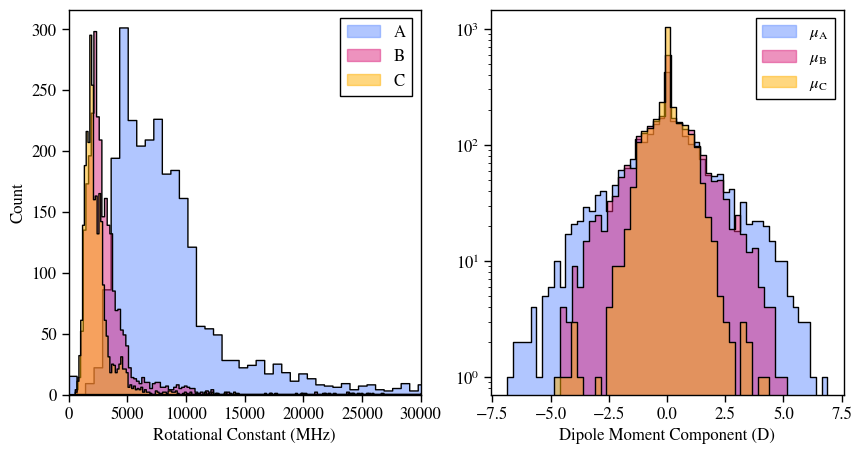

In [19]:
dataforA = df_ground['A [cm-1]'].values*29979.2458
dataforB = df_ground['B [cm-1]'].values*29979.2458
dataforC = df_ground['C [cm-1]'].values*29979.2458

dataA = {'A [MHz]':dataforA}
dataB = {'B [MHz]':dataforB} 
dataC = {'C [MHz]':dataforC} #*29979.2458

fig, ax = plt.subplots(1,2,figsize=(10, 5))


g = sns.histplot(data = dataA, x = 'A [MHz]', ax = ax[0], edgecolor = 'k', kde = False, element = 'step', alpha = 0.5, color = '#648FFF') 
g = sns.histplot(data = dataB, x = 'B [MHz]', ax = ax[0], edgecolor = 'k', kde = False, element = 'step', alpha = 0.5, color = '#DC267F') 
g = sns.histplot(data = dataC, x = 'C [MHz]', ax = ax[0], edgecolor = 'k', kde = False, element = 'step', alpha = 0.5, color = '#FFB000') 
ax[0].set_xlim(0,30000) 
# g.set_ylim(0.5,16000)
# g.set_yscale('log')
ax[0].set_xlabel("Rotational Constant (MHz)") 
ax[0].set_ylabel("Count") 

legend_elements = [Patch(facecolor='#648FFF', edgecolor='#648FFF', alpha = 0.5,
                         label=r'A'),
                   Patch(facecolor='#DC267F', edgecolor='#DC267F', alpha = 0.5,
                         label=r'B'),
                    Patch(facecolor='#FFB000', edgecolor='#FFB000', alpha = 0.5,
                         label=r'C')]

ax[0].legend(handles = legend_elements, loc = 'upper right')


dataA = {'mu_a [D]':df_ground['mu_a [D]'].values}
dataB = {'mu_b [D]':df_ground['mu_b [D]'].values}
dataC = {'mu_c [D]':df_ground['mu_c [D]'].values}

g = sns.histplot(data = dataA, x = 'mu_a [D]', ax = ax[1], edgecolor = 'k', kde = False, element = 'step', alpha = 0.5, color = '#648FFF',binwidth=0.25) 
g = sns.histplot(data = dataB, x = 'mu_b [D]', ax = ax[1], edgecolor = 'k', kde = False, element = 'step', alpha = 0.5, color = '#DC267F',binwidth=0.25) 
g = sns.histplot(data = dataC, x = 'mu_c [D]', ax = ax[1], edgecolor = 'k', kde = False, element = 'step', alpha = 0.5, color = '#FFB000',binwidth=0.25) 
# g.set_xlim(0,1) 
ax[1].set_yscale('log')
ax[1].set_xlabel("Dipole Moment Component (D)") 
ax[1].set_ylabel('') 

legend_elements = [Patch(facecolor='#648FFF', edgecolor='#648FFF', alpha = 0.5,
                         label=r'$\mu_\mathrm{A}$'),
                   Patch(facecolor='#DC267F', edgecolor='#DC267F', alpha = 0.5,
                         label=r'$\mu_\mathrm{B}$'),
                    Patch(facecolor='#FFB000', edgecolor='#FFB000', alpha = 0.5,
                         label=r'$\mu_\mathrm{C}$')]

ax[1].legend(handles = legend_elements, loc = 'upper right',)
plt.savefig('/Users/z5380625/Documents/Research/4_BigData/Plots/ABC_dipolemoment_histos.pdf',bbox_inches='tight')
plt.show()